### Setting Up Files and Directories

**NOTE**: the following steps help to automate file name that is used as the data source.

In [1]:
import os
print('The current working directory is:' + ' ' + os.getcwd())

The current working directory is: /Users/luismoreno/Documents/Python/python-datacamp/pandas/projects


#### Automate file name

In [2]:
# Import datetime library
from datetime import datetime

# Store todays date into "today_is"
today_is = datetime.today()

# Convert datetime objecto into a string
today_is_str = datetime.strftime(today_is, '%d-%m-%y')

In [7]:
file_path = str('/Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/Monefy.Data.' + str(today_is_str) + '.csv')
print('The file is located at: ' + file_path)

The file is located at: /Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/Monefy.Data.26-09-21.csv


In [12]:
# Import pandas package with alias "pd"
import pandas as pd

# Read CSV file
cash_flow = pd.read_csv(file_path)

#### DATAFRAME STRUCTURE

In [13]:
print(cash_flow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              111 non-null    object
 1   account           111 non-null    object
 2   category          111 non-null    object
 3   amount            111 non-null    object
 4   currency          111 non-null    object
 5   converted amount  111 non-null    object
 6   currency.1        111 non-null    object
 7   description       109 non-null    object
dtypes: object(8)
memory usage: 7.1+ KB
None


In [14]:
print(str(cash_flow.shape[0]) + ' ROWS')
print(str(cash_flow.shape[1]) + ' COLUMNS')

111 ROWS
8 COLUMNS


#### COLUMN NAMES

In [15]:
print(type(cash_flow.columns))
print(cash_flow.columns)


<class 'pandas.core.indexes.base.Index'>
Index(['date', 'account', 'category', 'amount', 'currency', 'converted amount',
       'currency.1', 'description'],
      dtype='object')


#### DATAFRAME DIMENSION

In [16]:
# Select only the 'date' column
cf_date_col = cash_flow['date'].values   

# Parse string into date type
for value in cf_date_col:
    cash_flow['date'] = datetime.strptime(value, '%d/%m/%Y')
    
print(cash_flow.head(3))

        date   account         category  amount currency converted amount  \
0 2021-09-27  Ingresos         Despensa     -15      MXN              -15   
1 2021-09-27  Ingresos  Restaurante/Bar     -50      MXN              -50   
2 2021-09-27  Ingresos        Depósitos  610.02      MXN           610.02   

  currency.1      description  
0        MXN    Fruta cortada  
1        MXN  1 Mazapán latte  
2        MXN         Reservas  


In [17]:
# Parse string into float type
for amount in cash_flow['converted amount']:
    # Delete commas of the string 'converted amount'
    no_comma_amount = amount.replace(',',"")
    cash_flow['amount_num'] = float(no_comma_amount)

In [18]:
print(cash_flow.head(5))

        date   account                    category  amount currency  \
0 2021-09-27  Ingresos                    Despensa     -15      MXN   
1 2021-09-27  Ingresos             Restaurante/Bar     -50      MXN   
2 2021-09-27  Ingresos                   Depósitos  610.02      MXN   
3 2021-09-27  Ingresos  Initial balance 'Ingresos'   6,000      MXN   
4 2021-09-27  Ingresos             Restaurante/Bar     -49      MXN   

  converted amount currency.1      description  amount_num  
0              -15        MXN    Fruta cortada     -1500.0  
1              -50        MXN  1 Mazapán latte     -1500.0  
2           610.02        MXN         Reservas     -1500.0  
3            6,000        MXN              NaN     -1500.0  
4              -49        MXN          Bionico     -1500.0  


In [24]:
for date in cash_flow["date"]:
    month = cash_flow[date].strftime("%d-%B")
print(cash_flow.head(5))

KeyError: Timestamp('2021-09-27 00:00:00')

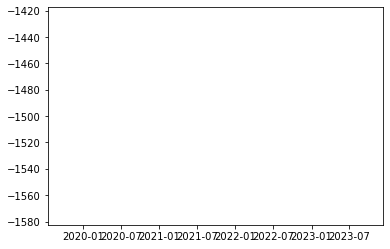

In [20]:
plt.plot(cash_flow["date"], cash_flow["amount_num"])
plt.show()